In [20]:
# auto-reload any module that changes on disk
%load_ext autoreload
%autoreload

In [40]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

import src.satellite as satellite

In [25]:
CWD = os.getcwd()
print(CWD)

PATH_TO_CSV = "/Users/jamesbyers/code/github/Kaggle/openai_to_z/data/metadata/cms_brazil_lidar_tile_inventory.csv"
PATH_TO_LAZ_DATA = "/Users/jamesbyers/code/github/Kaggle/openai_to_z/data/raw/laz"

/Users/jamesbyers/code/github/Kaggle/openai_to_z


In [45]:
df = pd.read_csv(PATH_TO_CSV)

In [46]:
# Round/quantize coordinates: 3 decimal places is ~100m
df['min_lat_q'] = np.round(df['min_lat'], 3)
df['max_lat_q'] = np.round(df['max_lat'], 3)
df['min_lon_q'] = np.round(df['min_lon'], 3)
df['max_lon_q'] = np.round(df['max_lon'], 3)

# Find unique sites based on quantized bounding box
unique_sites = df[['min_lat_q', 'max_lat_q', 'min_lon_q', 'max_lon_q']].drop_duplicates()
print(f"Number of unique ~100m buffered sites: {len(unique_sites)}")

Number of unique ~100m buffered sites: 2546


In [35]:
def get_coords_from_df(df, filename):
    row = df[df["filename"] == filename]
    min_lat = row["min_lat"]
    max_lat = row["max_lat"]
    min_lon = row["min_lon"]
    max_lon = row["max_lon"]

    return min_lat, max_lat, min_lon, max_lon

filenames = sorted(f for f in os.listdir(PATH_TO_LAZ_DATA) if f.lower().endswith(".laz"))
# print(len(filenames))
# print(filenames[0:5])

INDEX = 0

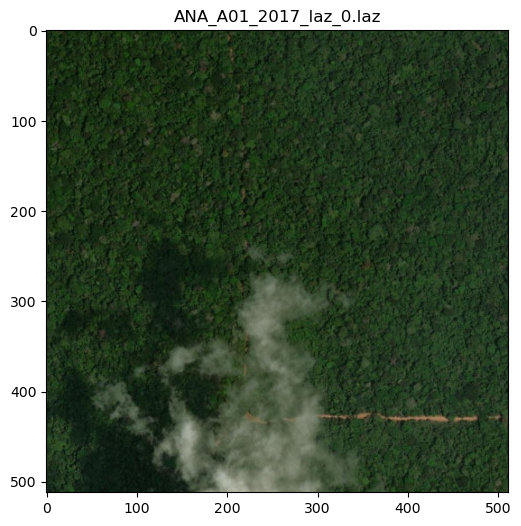

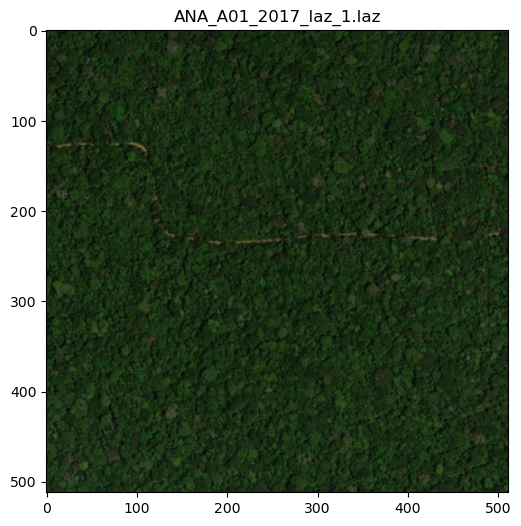

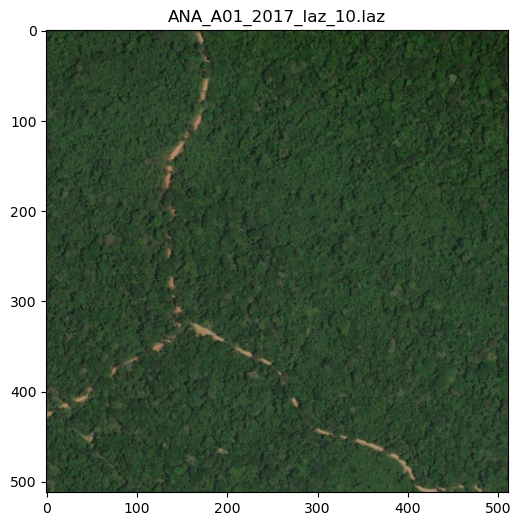

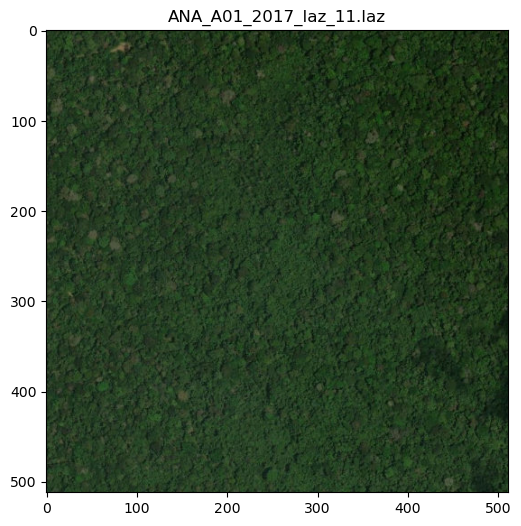

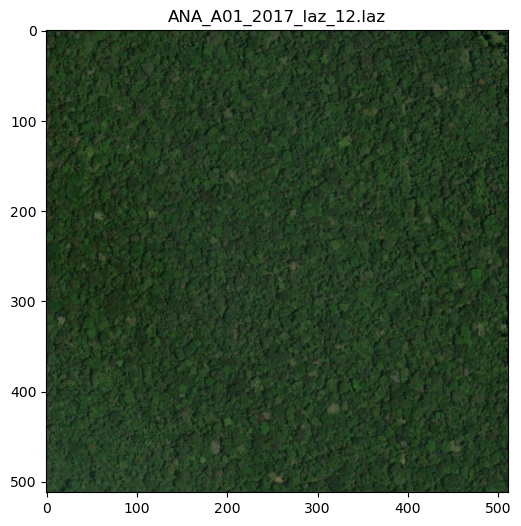

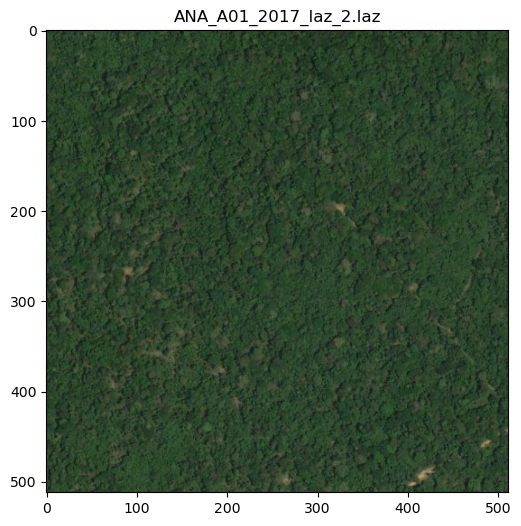

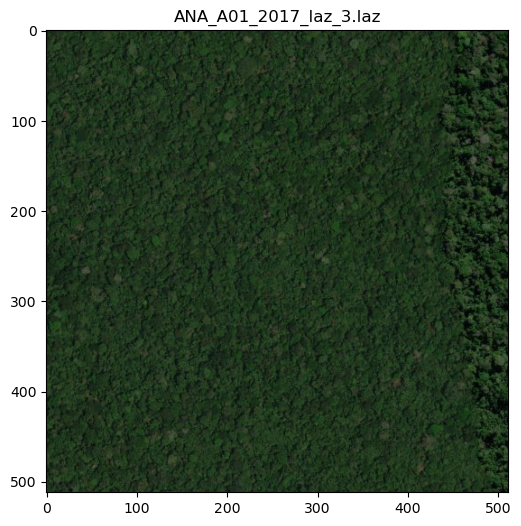

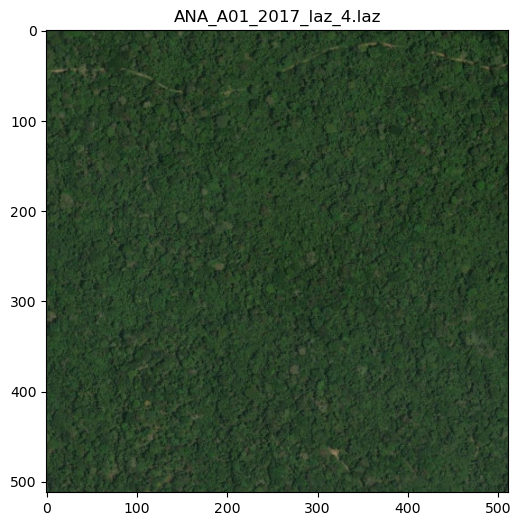

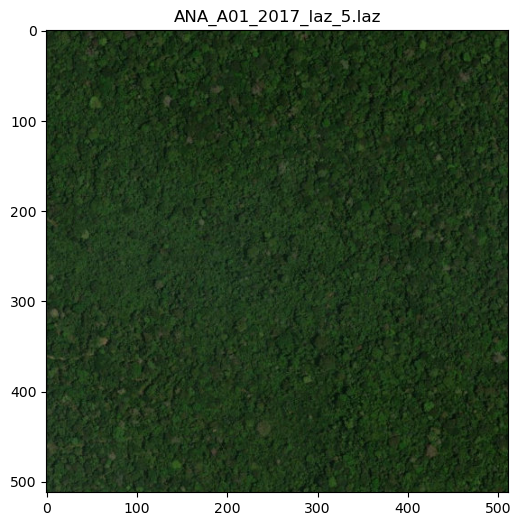

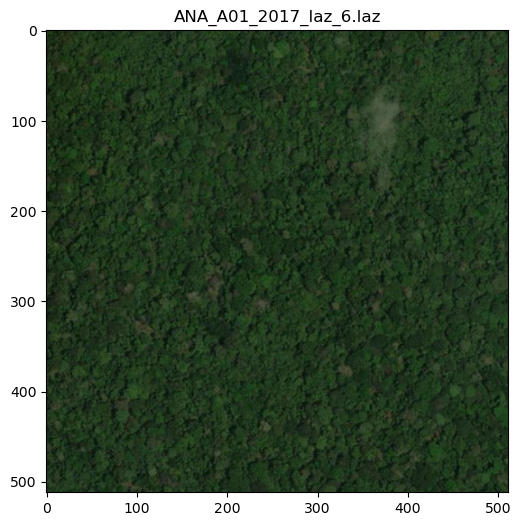

In [39]:
imgs = []
for i in range(10):
    filename = filenames[i]
    img = satellite.show_sat_image(df, filename)
    imgs.append(img)

In [42]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(imgs[i])
#     ax.set_title(filenames[i])
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [ ]:
# Set up the map at the average location
mean_lat = df[['min_lat', 'max_lat']].mean().mean()
mean_lon = df[['min_lon', 'max_lon']].mean().mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)

for _, row in df.iterrows():
    bounds = [
        [row['min_lat'], row['min_lon']],
        [row['max_lat'], row['max_lon']]
    ]
    folium.Rectangle(bounds, color='red', fill=False).add_to(m)

m.save('lidar_bounding_boxes_map.html')
print("Map saved to lidar_bounding_boxes_map.html")

Map saved to lidar_bounding_boxes_map.html


In [47]:


# Calculate mean coordinates for centering the map
mean_lat = df[['min_lat', 'max_lat']].mean().mean()
mean_lon = df[['min_lon', 'max_lon']].mean().mean()

# Make a map with Esri satellite base imagery
m = folium.Map(
    location=[mean_lat, mean_lon],
    zoom_start=8,
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri Satellite'
)

for _, row in df.iterrows():
    bounds = [
        [row['min_lat'], row['min_lon']],
        [row['max_lat'], row['max_lon']]
    ]
    folium.Rectangle(bounds, color='red', fill=False).add_to(m)

m.save('lidar_bounding_boxes_map.html')
print("Map saved to lidar_bounding_boxes_map.html")

Map saved to lidar_bounding_boxes_map.html
